## Cell Attachment

A equação que descreve a densidade de complexos receptor-ligante ao longo do tempo é:

$$
N_C = \frac{b+\sqrt{b^2-4a}}{2}\left\{\frac{1-\exp[-k_1 (\sqrt{b^2-4a})t]}{1-\left(\frac{b+\sqrt{b^2-4a}}{b-\sqrt{b^2-4a}}\right)\exp[-k_1 (\sqrt{b^2-4a})t]}\right\}
$$

Onde os termos $a$ e $b$ são definidos como:
$$
\begin{align*}
a &= N_{L_0}N_{R_0} \\
b &= N_{L_0} + N_{R_0} + K_D
\end{align*}
$$

E $K_D$ é a constante de dissociação, dada por $K_D = k_{-1}/k_1$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Parâmetros
N_L0 = 2e9  # Densidade inicial de ligantes (moléculas/cm^2)
N_R0 = 5e9  # Densidade inicial de receptores (moléculas/cm^2)
k1 = 1e-10   # Constante de taxa de associação (cm^2/(molécula*s))
k_minus_1 = 0.5  # Constante de taxa de dissociação (s^-1)

# Cálculo de K_D
K_D = k_minus_1 / k1

# Termos 'a' e 'b' da equação
a_term = N_L0 * N_R0
b_term = N_L0 + N_R0 + K_D

# Cálculo do discriminante
discriminant = b_term**2 - 4 * a_term

# Tratamento para discriminante próximo de zero
if discriminant < 0 and not np.isclose(discriminant, 0, atol=1e-10):
    raise ValueError("O discriminante é negativo. Ajuste os parâmetros para obter um resultado real.")
elif np.isclose(discriminant, 0, atol=1e-10):
    sqrt_discriminant = 0
else:
    sqrt_discriminant = np.sqrt(discriminant)

# Cálculo mais estável do termo (b - sqrt_discriminant)
# Isso é crucial para evitar perda de significância quando b ~ sqrt(discriminant)
if b_term + sqrt_discriminant != 0: # Evita divisão por zero
    term_b_minus_sqrt = (4 * a_term) / (b_term + sqrt_discriminant)
else:
    term_b_minus_sqrt = 0 # Caso extremo, indicando a=0 ou b grande e sqrt_discriminant = -b

# Valor de estado estacionário
N_C_ss = term_b_minus_sqrt / 2


In [26]:
time = np.linspace(0, 2, 500)
# Calcular N_C para cada ponto no tempo usando a forma reestruturada do denominador
N_C_values = []
for t in time:
    exp_argument = -k1 * sqrt_discriminant * t
    numerator_factor = 1 - np.exp(exp_argument)

    if term_b_minus_sqrt != 0 and (b_term + sqrt_discriminant) != 0: # Proteção contra divisão por zero
        ratio_for_exp_term = (b_term + sqrt_discriminant) / term_b_minus_sqrt
    else:
        ratio_for_exp_term = 0 
        
    denominator_factor = 1 - ratio_for_exp_term * np.exp(exp_argument)
    
    if np.isclose(denominator_factor, 0, atol=1e-15):
        # Se o denominador for muito próximo de zero, N_C(t) se aproxima do estado estacionário
        N_C_t = N_C_ss
    else:
        N_C_t = (term_b_minus_sqrt / 2) * (numerator_factor / denominator_factor)
        
    N_C_values.append(N_C_t)

# Converter para array numpy para plotagem
N_C_values = np.array(N_C_values)

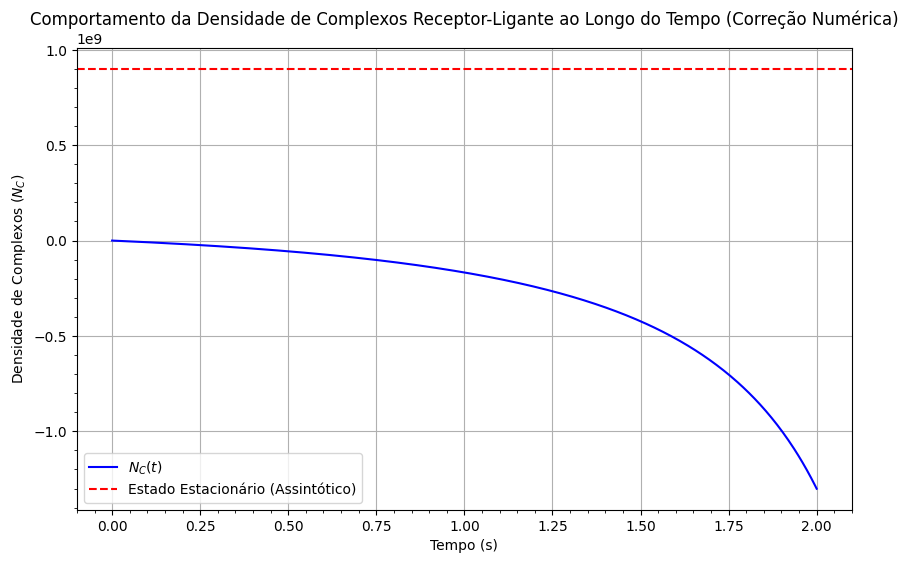

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(time, N_C_values, label=r'$N_C(t)$', color='blue')
plt.axhline(y=N_C_ss, color='red', linestyle='--', label='Estado Estacionário (Assintótico)')
plt.xlabel('Tempo (s)')
plt.ylabel(r'Densidade de Complexos ($N_C$)')
plt.title('Comportamento da Densidade de Complexos Receptor-Ligante ao Longo do Tempo (Correção Numérica)')
plt.legend()
plt.grid(True)
plt.minorticks_on()
plt.show()

### Caso estacionário

In [ ]:
# Termos para a equação de estado estacionário (Eq. 12.3.6)
b_term_ss = N_L0 + N_R0 + K_D
a_term_ss_discriminant = 4 * N_L0 * N_R0

# Cálculo do discriminante
discriminant_ss = b_term_ss**2 - a_term_ss_discriminant

# Verificação da condição para a raiz quadrada
if discriminant_ss < 0:
    if np.isclose(discriminant_ss, 0, atol=1e-10):
        discriminant_ss = 0
    else:
        raise ValueError("Discriminante negativo para o estado estacionário, ajuste os parâmetros.")

# Cálculo do valor de N_C no estado estacionário
N_C_ss = 0.5 * (b_term_ss - np.sqrt(discriminant_ss))

# Criar um array de tempo para a plotagem (o valor é constante, mas plotamos em função do tempo)
time = np.linspace(0, 5, 500)

# Criar um array com o valor constante de N_C_ss para plotagem
N_C_ss_values = np.full_like(time, N_C_ss)

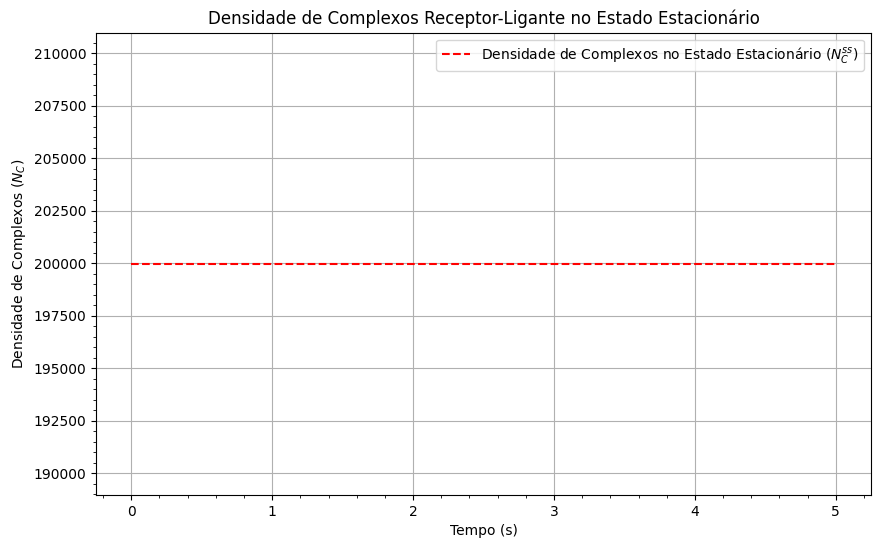

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(time, N_C_ss_values, color='red', linestyle='--', label='Densidade de Complexos no Estado Estacionário ($N_C^{ss}$)')
plt.xlabel('Tempo (s)')
plt.ylabel(r'Densidade de Complexos ($N_C$)')
plt.title('Densidade de Complexos Receptor-Ligante no Estado Estacionário')
plt.legend()
plt.grid(True)
plt.minorticks_on()
plt.show()